<a href="https://colab.research.google.com/github/kimbob123/LendingClub_ML/blob/main/PCA_safe_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###전처리

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML & DL/train 2.csv')

In [10]:
from sklearn.preprocessing import MinMaxScaler
df_train = df.drop(['target', 'id'], axis=1)

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_train)

df_scaled = pd.DataFrame(scaled, columns=df_train.columns)
df_scaled.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.285714,0.6,0.454545,1.0,0.142857,0.0,1.0,0.0,0.0,0.0,...,0.473684,0.1,0.384615,0.347826,0.0,1.0,1.0,0.0,0.0,1.0
1,0.142857,0.4,0.636364,0.5,0.142857,0.0,0.0,1.0,0.0,0.0,...,0.157895,0.1,0.076923,0.391304,0.0,1.0,1.0,0.0,1.0,0.0
2,0.714286,1.0,0.818182,1.0,0.142857,0.0,0.0,1.0,0.0,0.0,...,0.210526,0.2,0.538462,0.304348,0.0,1.0,1.0,0.0,1.0,0.0
3,0.000000,0.4,0.181818,0.5,0.142857,1.0,0.0,0.0,0.0,0.0,...,0.105263,0.2,0.307692,0.391304,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.6,0.000000,1.0,0.142857,1.0,0.0,0.0,0.0,0.0,...,0.157895,0.1,0.076923,0.130435,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# PCA 모델 생성
pca = PCA()
pca.fit(df_scaled)
# 누적 설명 가능한 분산의 비율 계산
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

주성분 개수	누적 설명 가능한 분산 비율
36		0.9506810087089301
37		0.9562529221480437
38		0.9610600817085853
39		0.9652514140559466
40		0.9692686937499586


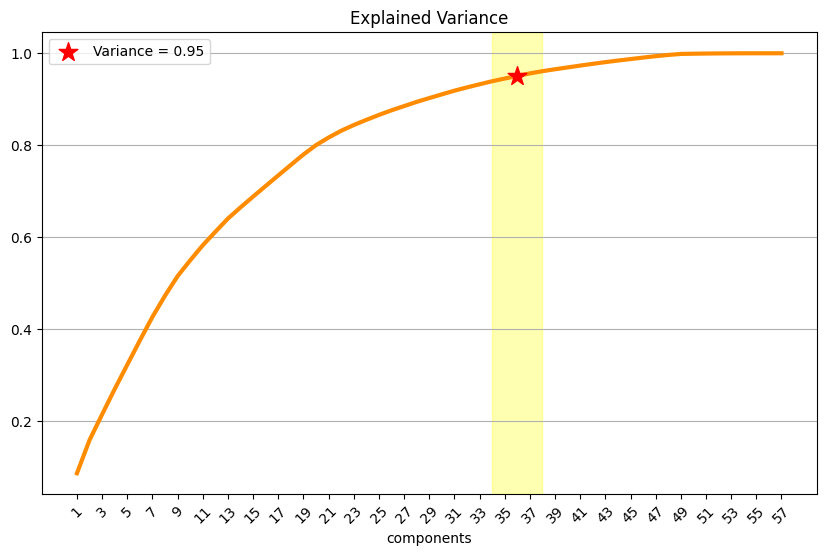

In [51]:
import seaborn as sns
# 주성분 개수별 설명 가능한 분산의 비율 출력 및 별 표시
print("주성분 개수\t누적 설명 가능한 분산 비율")
for i, explained_variance_ratio in enumerate(cumulative_variance_ratio):
    if 0.95 <= explained_variance_ratio <= 0.97:
      print(f"{i+1}\t\t{explained_variance_ratio}")

# 시각화: 주성분 개수에 따른 설명 가능한 분산 비율
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(cumulative_variance_ratio) + 1), y=cumulative_variance_ratio, color='darkorange',linewidth=3)
plt.title('Explained Variance')
plt.xlabel('components')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1), rotation=45)
plt.locator_params(axis='x', nbins=(len(cumulative_variance_ratio)+1)/2)
plt.grid(True, axis='y')   # 세로 그리드 제거
plt.axvspan(34, 38, color='yellow', alpha=0.3)

# 설명 가능한 분산이 0.95 이상 0.97 이하인 지점에 별 표시 및 회색 음영 추가
highlighted_indexes = []
for i, explained_variance_ratio in enumerate(cumulative_variance_ratio):
    if 0.95 <= explained_variance_ratio < 0.951:
        plt.scatter(i + 1, explained_variance_ratio, marker='*', color='red',zorder=3, s=200, label='Variance = 0.95')
        highlighted_indexes.append(i + 1)
plt.legend()
plt.show()


###본격 PCA

In [56]:
pca = PCA(n_components=36)
principalComponents = pca.fit_transform(df_scaled)
column_names = [f'PC{i+1}' for i in range(principalComponents.shape[1])]
principalDf = pd.DataFrame(data=principalComponents, columns =column_names)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
0,1.027564,0.466902,-0.372715,0.308791,-0.336580,-0.373490,-0.352028,-0.280434,-0.223738,0.325367,...,0.005950,-0.074426,-0.184018,-0.155658,0.036867,-0.194795,-0.255246,0.086197,0.112956,0.167178
1,0.217519,0.776205,-0.600800,-0.623504,0.388126,-0.373358,0.655333,-0.297411,0.669355,0.374015,...,-0.224041,-0.125057,-0.094007,-0.106931,-0.141265,-0.191027,-0.151834,0.176893,0.003944,0.063231
2,-0.070648,-0.663488,-0.521213,-0.298864,0.151384,-0.375639,0.647706,-0.303032,1.154790,0.237029,...,0.212247,0.135458,-0.176032,0.023189,0.011192,-0.043374,0.115151,-0.182087,-0.004935,0.142191
3,-0.536127,-0.097642,0.703957,0.636927,0.138908,0.621383,-0.346853,-0.277426,-0.109699,-0.380901,...,0.263639,-0.134421,0.053952,0.335029,0.119052,0.222694,-0.194152,0.174205,-0.005930,-0.060004
4,-0.890011,-0.099286,0.496979,-0.220533,-0.237851,0.642842,0.643999,0.717719,-0.064918,0.083444,...,0.045167,0.104322,-0.091035,0.005665,0.051668,-0.054047,-0.063972,0.205776,-0.089789,0.097950


In [55]:
principalDf.to_csv('/content/drive/MyDrive/Colab Notebooks/ML & DL/PCA_36.csv')